# Different cases with Datasets

# Splitting Stratergy

In [1]:
#Criterias: 
# 80(Training)-20(Tetsting)
# 70(Training)-30(Testing)

In [2]:
#load the dataset
import pandas as pd
df = pd.read_csv('Salary_Data.csv')
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [3]:
#Separate input and output
X = df[['YearsExperience']]
X[:2]

,YearsExperience
0,1.1
1,1.3


In [4]:
y = df.Salary
y[:3]

0    39343.0
1    46205.0
2    37731.0
Name: Salary, dtype: float64

In [6]:
# now, lets split the above data(X,y) into training and testing output resp. using train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

In [7]:
# check the shape of our original dataframe
df.shape

(30, 2)

In [10]:
#suppose will use 80-20 strategy
#80% for training and 20% for testing the values ie no of rows
#for 80%
30*.8

24.0

In [12]:
#for 20%
30*.2

6.0

In [13]:
#Split arrays or matrices into random train and test subsets
#80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,train_size=.8)

## for Training Data

In [17]:
len(X_train)

24

In [18]:
len(y_train)

24

## for Testing Data

In [19]:
len(X_test)

6

In [20]:
len(y_test)

6

In [22]:
#We will use X_train,y_train for training===> fit()
#X_test will use for testing ==> predict()
#predict() will give u predicted result which is y_pred
#then we can compare predictd with actual output which is y_test

## Training Phase

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model

LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

## Testing Phase

In [26]:
model.predict(X_test)

array([39689.63569634, 82160.07621496, 68003.26270875, 52902.66163547,
       53846.44920255, 60452.96217211])

In [27]:
# above output is predicted y result
y_pred = model.predict(X_test)
y_pred

array([39689.63569634, 82160.07621496, 68003.26270875, 52902.66163547,
       53846.44920255, 60452.96217211])

In [28]:
X_test[:2] #testing output

,YearsExperience
2,1.5
19,6.0


In [30]:
#Now, add acutal output +predicted output columns in our dataset
#first create column for actual output as 'Actual' and assign it to our testing output ie. y_test
X_test['Actual'] = y_test

In [31]:
X_test

,YearsExperience,Actual
2,1.5,37731.0
19,6.0,93940.0
14,4.5,61111.0
5,2.9,56642.0
6,3.0,60150.0
9,3.7,57189.0


In [32]:
#Now, create a new column for predicted result as 'predicted' and assign it to the predicted output ie. y_pred
X_test['predicted'] = y_pred

In [33]:
X_test

,YearsExperience,Actual,predicted
2,1.5,37731.0,39689.635696
19,6.0,93940.0,82160.076215
14,4.5,61111.0,68003.262709
5,2.9,56642.0,52902.661635
6,3.0,60150.0,53846.449203
9,3.7,57189.0,60452.962172


In [34]:
#Now, lets Calculate the error
# actual - predicted
error = X_test.Actual - X_test.predicted
error

2     -1958.635696
19    11779.923785
14    -6892.262709
5      3739.338365
6      6303.550797
9     -3263.962172
dtype: float64

In [35]:
#add above error also in our dataframe
X_test['error'] = error

In [36]:
X_test

,YearsExperience,Actual,predicted,error
2,1.5,37731.0,39689.635696,-1958.635696
19,6.0,93940.0,82160.076215,11779.923785
14,4.5,61111.0,68003.262709,-6892.262709
5,2.9,56642.0,52902.661635,3739.338365
6,3.0,60150.0,53846.449203,6303.550797
9,3.7,57189.0,60452.962172,-3263.962172


Text(0.5, 1.0, 'Test data ploting act vs predicted')

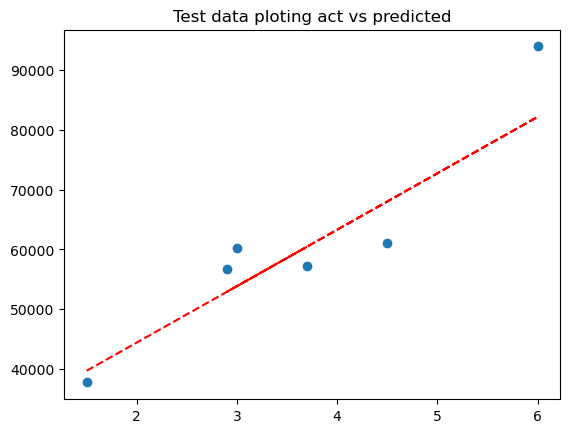

In [38]:
#Now, plot above test data
import matplotlib.pyplot as plt
plt.scatter(X_test.YearsExperience,X_test.Actual)
plt.plot(X_test.YearsExperience,X_test.predicted,'--r')
plt.title('Test data ploting act vs predicted')

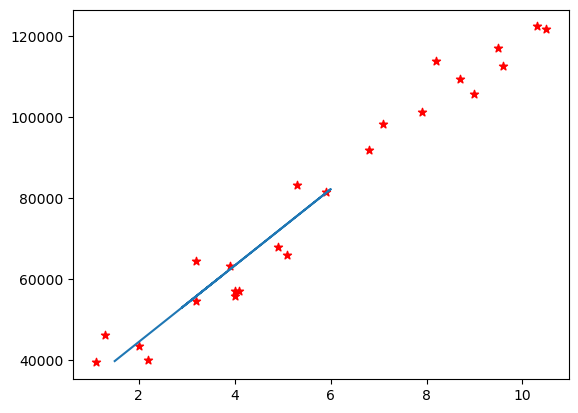

In [39]:
plt.scatter(X_train,y_train,color='red',marker='*',label='Actual data')
plt.plot(X_test.YearsExperience,y_pred)
plt.show()

In [40]:
#X value is 0
model.predict([[0]])

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25532.82219014])

In [41]:
#y = mx +c
#slope
m = model.coef_
m

array([9437.8756708])

In [42]:
c = model.intercept_
c

25532.822190136772

In [43]:
#now put the values in a formula
m*0+c

array([25532.82219014])

In [44]:
#for exp 2.5
m*2.5 + c

array([49127.51136715])

In [45]:
model.predict([[2.5]])

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49127.51136715])

In [46]:
3.6 - .4*3

2.4

In [47]:
#calculate score of training data
model.score(X_train,y_train)*100

96.28232780438604

In [48]:
#calculate score of test data
model.score(X_test[['YearsExperience']],y_test)*100

84.67600208801373

In [49]:
# score of actual test data and predicted is alwyas 100
model.score(X_test[['YearsExperience']],y_pred)*100

100.0